In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pickle


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Step 1 - First we will clean the data

In [7]:
df = pd.read_csv('milk2 production 2015 2019.csv')

In [8]:
df.head()

,month,milk production per month in litres
0,2015-01,8053.5
1,2015-02,6045.5
2,2015-03,5461.3
3,2015-04,3576.5
4,2015-05,5044.5


In [9]:
df.columns  = ['Month','Milk in litres for Cow']

In [10]:
df.tail()

,Month,Milk in litres for Cow
55,2019-08,2682.0
56,2019-09,2911.5
57,2019-10,2738.0
58,2019-11,4612.5
59,2019-12,3439.0


In [11]:
df.drop(59,axis=0,inplace=True)

In [12]:
df.tail()

,Month,Milk in litres for Cow
54,2019-07,2830.5
55,2019-08,2682.0
56,2019-09,2911.5
57,2019-10,2738.0
58,2019-11,4612.5


In [13]:
df['Month'] = pd.to_datetime(df['Month'])

In [14]:
df.head()

,Month,Milk in litres for Cow
0,2015-01-01,8053.5
1,2015-02-01,6045.5
2,2015-03-01,5461.3
3,2015-04-01,3576.5
4,2015-05-01,5044.5


In [15]:
df.set_index('Month',inplace=True)

In [16]:
df.head()

,Milk in litres for Cow
Month,
2015-01-01,8053.5
2015-02-01,6045.5
2015-03-01,5461.3
2015-04-01,3576.5
2015-05-01,5044.5


In [17]:
df.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in litres for Cow,59.0,4262.564407,1376.445445,246.5,3284.0,4261.0,5072.0,8053.5


In [19]:
#Step2 - We will visualize the data now

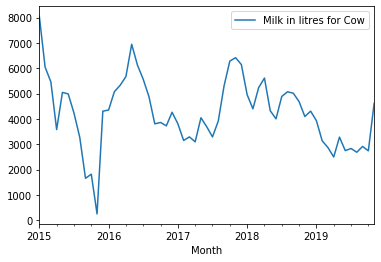

In [20]:
df.plot()

In [21]:
time_series = df['Milk in litres for Cow']

In [22]:
type(time_series)

pandas.core.series.Series

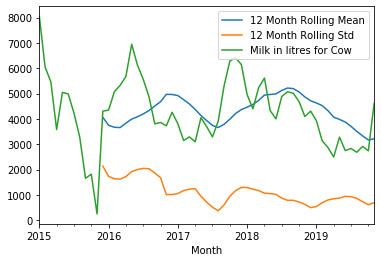

In [23]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend()

In [24]:
# Now let us check the ETS decomposition plot (Trend, Seasonallity and Residual)

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
decomp = seasonal_decompose(time_series)

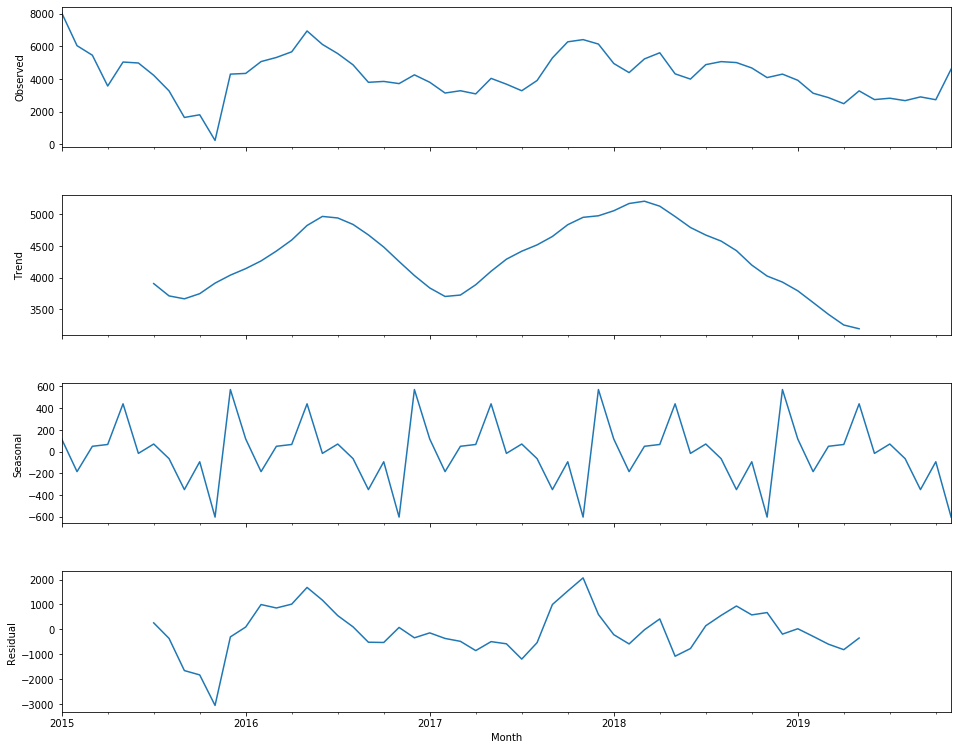

In [27]:
fig = decomp.plot()
fig.set_size_inches(15,12)

We will do some mathematics now: (Augmented Dickey–Fuller test).
Through this we can check whether the time series is sationary or not. We will check this through the p value.If p value is small, lets say p < 0.5: reject the null hypothesis, which means time series is stationary.

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
result = adfuller(df['Milk in litres for Cow'])

In [30]:
def adf_check(time_series):
    
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistics','p-value','# of lags','Num of Observations']
    
    for value,label in zip(result,labels):
        print(label+ " : "+str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root and is non-stationary")

In [31]:
adf_check(df['Milk in litres for Cow'])

Augmented Dicky-Fuller Test
ADF Test Statistics : -3.916565968545635
p-value : 0.0019162573806789486
# of lags : 5
Num of Observations : 53
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [32]:
df['First Difference'] = df['Milk in litres for Cow'] - df['Milk in litres for Cow'].shift(1)

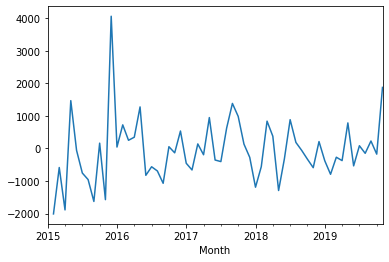

In [33]:
df['First Difference'].plot()

In [34]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics : -7.756575541556162
p-value : 9.701735352096109e-12
# of lags : 0
Num of Observations : 57
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [35]:
#So we successfully made our time series stationary. If this wasn't enough, we would have done a second differencing on this.

In [36]:
#Seasonal Difference:

In [37]:
df['Seasonal Difference'] = df['Milk in litres for Cow'] - df['Milk in litres for Cow'].shift(12)

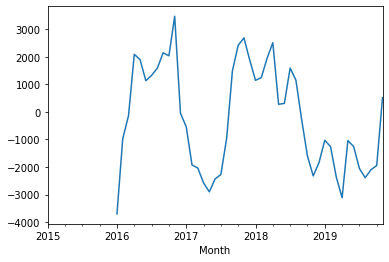

In [38]:
df['Seasonal Difference'].plot()

In [39]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics : -2.582891229688288
p-value : 0.09658510937542264
# of lags : 1
Num of Observations : 45
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


**It seems that variance start to increase if we go further in time. In this case we can check for seasonal first difference.**

In [40]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

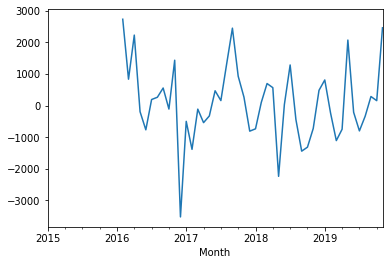

In [41]:
df['Seasonal First Difference'].plot()

In [42]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics : -5.682854882737093
p-value : 8.408359938644852e-07
# of lags : 0
Num of Observations : 45
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [43]:
#Step 4: We will now create ACF and PACF plots.

In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

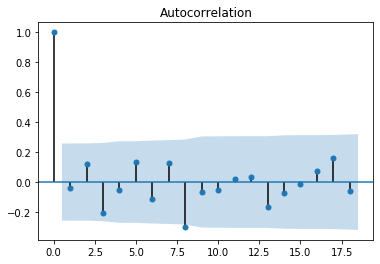

In [45]:
fig_first = plot_acf(df['First Difference'].dropna())

In [46]:
#This is an example of gradual decline.

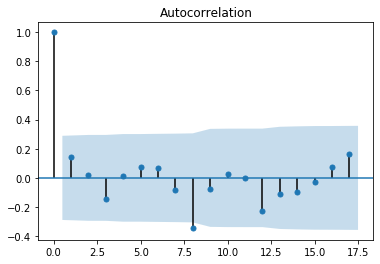

In [47]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

In [48]:
#There is a sharp drop off and this is a popular auto correlation plot to see.

In [49]:
#We can do this using pandas also, but only for acf and not pacf

In [50]:
from pandas.plotting import autocorrelation_plot

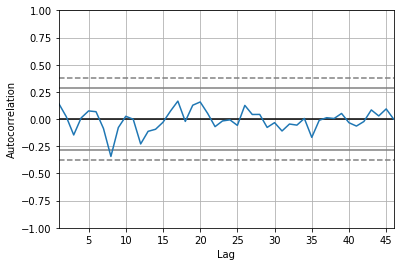

In [51]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())


If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag.If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using  MA terms.

This will allow us to decide what actual values of p,d and q to provide for our ARIMA model.

p --> # of lag observations<br>
d --> # of times that raw observations are differenced <br>
q --> the size of the moving average window, also called the order of moving average <br>

Now we will plot a pacf. In general, a partial correlation is a conditional correlation.

**It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables.**

Typically a sharp drop after lag "k" suggests an AR-k model should be used. If there is a gradual decline, it suggests an MA model.


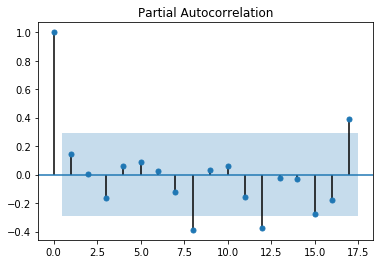

In [52]:
result = plot_pacf(df['Seasonal First Difference'].dropna())

In [53]:
#We will create our final acf and pacf plots for referring to our ARIMA model:

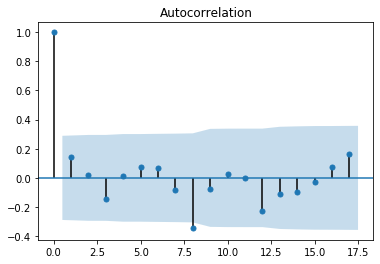

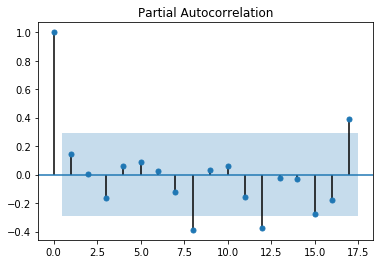

In [54]:
plot_acf(df['Seasonal First Difference'].dropna());
plot_pacf(df['Seasonal First Difference'].dropna());

In [55]:
#Step 5: Now since our data is seasonal, we will apply seasonal ARIMA.

In [56]:
from statsmodels.tsa.arima_model import ARIMA

In [57]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


In [58]:
model = sm.tsa.statespace.SARIMAX(df['Milk in litres for Cow'],order=(0,1,0),seasonal_order=(1,1,1,12))

C:\Users\Tarcisious\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [59]:
results = model.fit()


C:\Users\Tarcisious\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [60]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in litres for Cow   No. Observations:                   59
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -385.969
Date:                            Fri, 05 Feb 2021   AIC                            777.938
Time:                                    10:51:27   BIC                            783.424
Sample:                                01-01-2015   HQIC                           779.993
                                     - 11-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3018      0.161      1.874      0.061      -0.014       0.617
ma.S.L12      -1.0000      0.197   

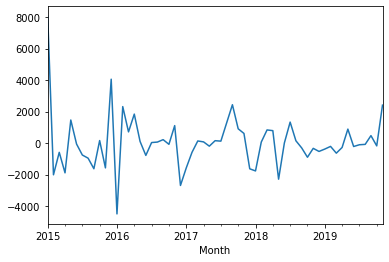

In [61]:
results.resid.plot()

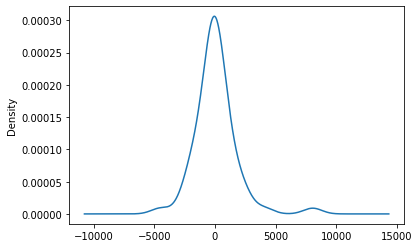

In [62]:
results.resid.plot(kind='kde')

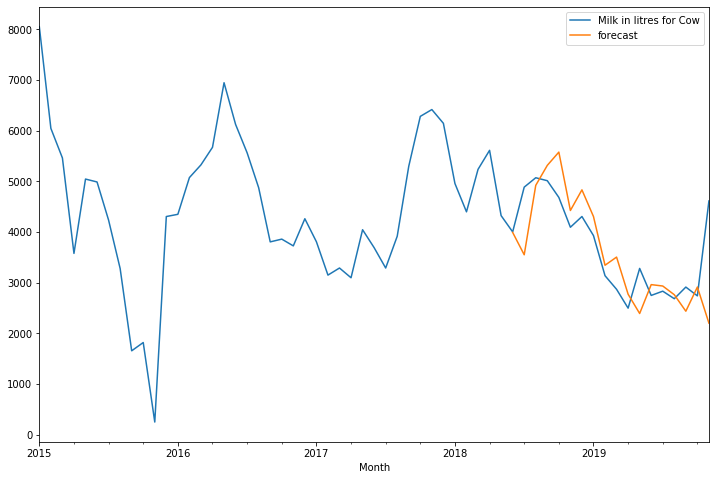

In [63]:
df['forecast'] = results.predict(start=41, end=59)
df[['Milk in litres for Cow','forecast']].plot(figsize=(12,8))

In [64]:
df.tail()

,Milk in litres for Cow,First Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,
2019-07-01,2830.5,84.0,-2054.5,-800.0,2932.512491
2019-08-01,2682.0,-148.5,-2388.5,-334.0,2760.554178
2019-09-01,2911.5,229.5,-2100.5,288.0,2434.866827
2019-10-01,2738.0,-173.5,-1944.0,156.5,2911.990109
2019-11-01,4612.5,1874.5,519.5,2463.5,2199.562107


In [65]:
from pandas.tseries.offsets import DateOffset

In [66]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [67]:
future_dates

[Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00')]

In [68]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns)

In [69]:
future_df

,Milk in litres for Cow,First Difference,Seasonal Difference,Seasonal First Difference,forecast
2019-12-01,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,NaN,NaN
2020-04-01,NaN,NaN,NaN,NaN,NaN
2020-05-01,NaN,NaN,NaN,NaN,NaN
2020-06-01,NaN,NaN,NaN,NaN,NaN
2020-07-01,NaN,NaN,NaN,NaN,NaN
2020-08-01,NaN,NaN,NaN,NaN,NaN
2020-09-01,NaN,NaN,NaN,NaN,NaN


In [70]:
final_df = pd.concat([df,future_df])

In [71]:
final_df.tail()

,Milk in litres for Cow,First Difference,Seasonal Difference,Seasonal First Difference,forecast
2021-06-01,NaN,NaN,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN,NaN,NaN
2021-08-01,NaN,NaN,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN,NaN,NaN
2021-10-01,NaN,NaN,NaN,NaN,NaN


In [72]:
final_df['forecast'] = results.predict(starts=59,end=83)

In [73]:
final_df.tail()

,Milk in litres for Cow,First Difference,Seasonal Difference,Seasonal First Difference,forecast
2021-06-01,NaN,NaN,NaN,NaN,5490.978083
2021-07-01,NaN,NaN,NaN,NaN,5372.512816
2021-08-01,NaN,NaN,NaN,NaN,5178.927888
2021-09-01,NaN,NaN,NaN,NaN,4998.835212
2021-10-01,NaN,NaN,NaN,NaN,5077.657642


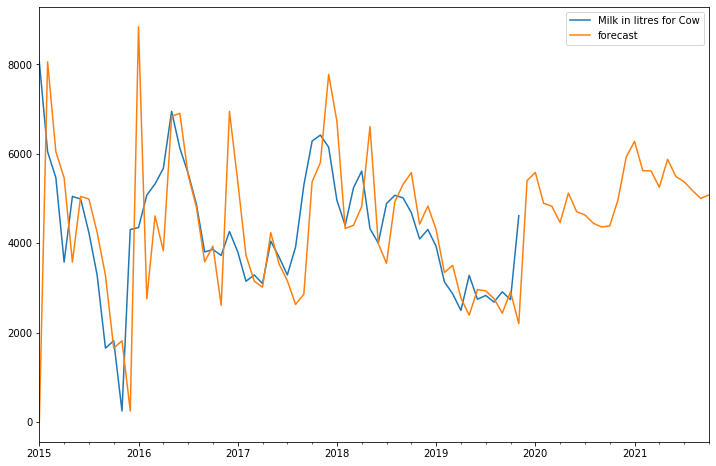

In [74]:
final_df[['Milk in litres for Cow','forecast']].plot(figsize=(12,8))

**We have successfully forecasted for next 2 years and seems that it fits in well.**